| | |
|:----------|:----------|
| Name      | Bayesian Modeling |
| Notebook  | Gibbs sampler |
| Author    | Joshuah Touyz, PhD |
| Version   | 0.1 |
|Last update| 02/29/20 |

In [3]:
import numpy as np
import pandas as pd
from plotnine import *

In [9]:
### Example Gibbs Sampler ###

# Summary stats from the sample
n    = 30
ybar = 15
s2   = 3

# Pre-allocation 
mu     = np.ones(11000)
tau    = np.ones(11000)

# Constants
T      = 1000    # burnin
tau[1] = 1  # initialisation

# Utility functions
rnorm = lambda mean_in, sd_in: np.random.normal(size = 1,loc = mean_in, scale = sd_in)
rgamma = lambda shape,scale: np.random.gamma(size = 1, shape = shape, scale = scale)

# Gibbs Sampler (mu, tau | data)
for i in range(1,11000):   
    mu[i]  = rnorm( mean_in = ybar, sd_in = np.sqrt(1 / (n * tau[i - 1])))    
    tau[i] = rgamma(shape = n / 2, scale = 2 / ((n - 1) * s2 + n * (mu[i] - ybar)**2))
# Remove burnin
mu  = mu[-T:]   
tau = tau[-T:] 

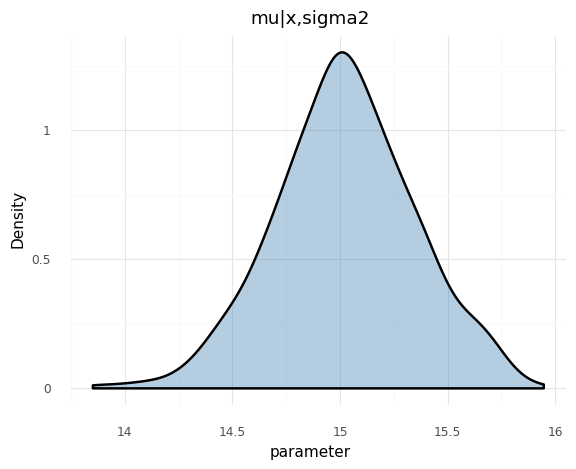

<ggplot: (-9223372036569474125)>

In [21]:

# Plot graph
def plot_parameter(data_in, parameter):
    p = (ggplot(aes(x = 'parameter'), data = pd.DataFrame({'parameter' : data_in})) + 
      geom_density(fill = 'steelblue', size = 1,alpha= 0.4) + 
      theme_minimal() + ylab('Density'))
    return(p)
  
plot_parameter(mu,'mu')+ggtitle('mu|x,sigma2')

In [ ]:

plot_parameter(tau,'tau')+ggtitle('tau|x,mu')
